In [102]:
import pandas as pd 
편의점수=pd.read_csv("c:/data/project/team/raw/편의점수.csv",encoding='cp949')
시군구상권코드=pd.read_csv("c:/data/project/team/raw/시군구상권코드.csv",encoding='cp949')

In [104]:
test

,기준년코드,기준분기코드,상권구분코드,상권구분코드명,상권코드,상권코드명,서비스업종코드,서비스업종코드명,점포수,유사업종점포수,개업율1,개업율,개업점포수,폐업률1,폐업률,폐업점포수,프랜차이즈점포수,시군구코드,시군구명
0,2015,1,D,발달상권,1001058,역삼역_1,CS300002,편의점,0,4,0.0,0,0,0.0,0,0,4,11680,강남구
1,2015,2,D,발달상권,1001058,역삼역_1,CS300002,편의점,0,4,0.0,0,0,0.0,0,0,4,11680,강남구
2,2015,3,D,발달상권,1001058,역삼역_1,CS300002,편의점,0,4,0.0,0,0,0.0,0,0,4,11680,강남구
3,2015,4,D,발달상권,1001058,역삼역_1,CS300002,편의점,0,4,0.0,0,0,0.0,0,0,4,11680,강남구
4,2016,1,D,발달상권,1001058,역삼역_1,CS300002,편의점,0,5,0.2,20,1,0.0,0,0,5,11680,강남구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26604,2019,3,A,골목상권,1000657,금하로1길,CS300002,편의점,0,1,0.0,0,0,0.0,0,0,1,11545,금천구
26605,2019,4,A,골목상권,1000657,금하로1길,CS300002,편의점,0,1,0.0,0,0,0.0,0,0,1,11545,금천구
26606,2019,3,R,전통시장,1001289,용문전통시장,CS300002,편의점,0,1,1.0,100,1,0.0,0,0,1,11170,용산구
26607,2019,4,R,전통시장,1001289,용문전통시장,CS300002,편의점,0,1,0.0,0,0,0.0,0,0,1,11170,용산구


In [110]:
시군구명=pd.merge(편의점수,시군구상권코드)
시군구명=test.groupby(['시군구명'],as_index=False).sum()
시군구명.loc[:,['시군구명','유사업종점포수','개업점포수','폐업점포수']]
# test.loc[:,['시군구명','개업점포수','폐업점포수']].sum()

,시군구명,유사업종점포수,개업점포수,폐업점포수
0,강남구,15231,617,603
1,강동구,4655,191,163
2,강북구,2676,106,99
3,강서구,4343,197,141
4,관악구,5990,235,190
5,광진구,3851,177,139
6,구로구,3920,182,143
7,금천구,3026,142,105
8,노원구,1434,57,49
9,도봉구,1777,63,46


In [20]:
편의점수.loc[:,['개업점포수','폐업점포수']].sum()

개업점포수    4647
폐업점포수    3986
dtype: int64

In [36]:
편의점수=편의점수.groupby(['기준분기코드'],as_index=False).sum()
편의점수=편의점수.loc[:,['기준분기코드','개업점포수']]
편의점수

,기준분기코드,개업점포수
0,1,1051
1,2,1273
2,3,1154
3,4,1169


In [93]:
폐업수=편의점수.groupby(['기준년코드','기준분기코드'],as_index=False).sum()
폐업수=폐업수.loc[:,['기준년코드','기준분기코드','폐업점포수']]
폐업수['기준년코드'] = 폐업수['기준년코드'].astype('object')
폐업수['기준분기코드'] = 폐업수['기준분기코드'].astype('object')
폐업수['기준년도코드']=폐업수['기준년코드'].map(str)+"년"+폐업수['기준분기코드'].map(str)+"분기"
폐업수=폐업수.drop(['기준년코드','기준분기코드'],axis='columns')
폐업수

,폐업점포수,기준년도코드
0,146,2015년1분기
1,174,2015년2분기
2,172,2015년3분기
3,209,2015년4분기
4,193,2016년1분기
5,152,2016년2분기
6,182,2016년3분기
7,222,2016년4분기
8,207,2017년1분기
9,188,2017년2분기


In [92]:
개업수=편의점수.groupby(['기준년코드','기준분기코드'],as_index=False).sum()
개업수=개업수.loc[:,['기준년코드','기준분기코드','개업점포수']]
개업수['기준년코드'] = 개업수['기준년코드'].astype('object')
개업수['기준분기코드'] = 개업수['기준분기코드'].astype('object')
개업수['기준년도코드']=개업수['기준년코드'].map(str)+"년"+개업수['기준분기코드'].map(str)+"분기"
개업수=개업수.drop(['기준년코드','기준분기코드'],axis='columns')
개업수

,개업점포수,기준년도코드
0,185,2015년1분기
1,296,2015년2분기
2,268,2015년3분기
3,321,2015년4분기
4,246,2016년1분기
5,278,2016년2분기
6,300,2016년3분기
7,317,2016년4분기
8,245,2017년1분기
9,287,2017년2분기


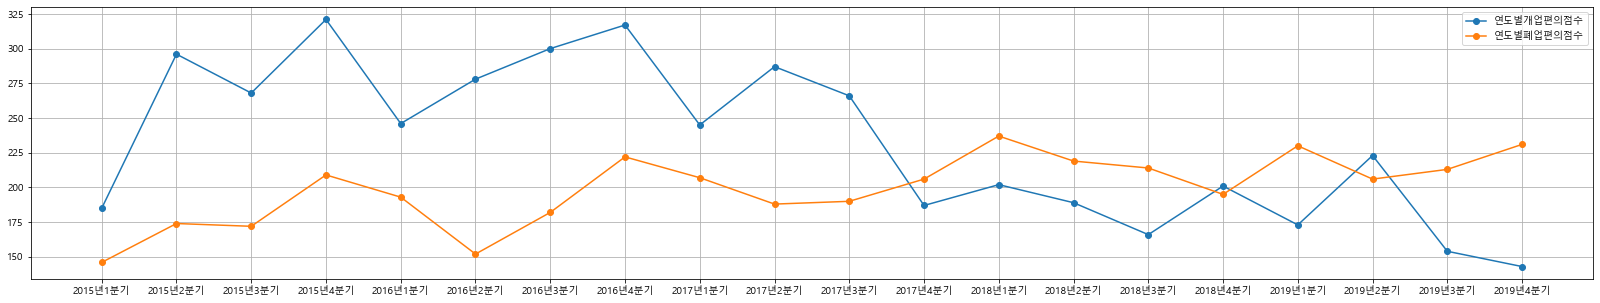

In [98]:
%matplotlib inline
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(28,5))
plt.rcParams['axes.grid'] = True
ax=fig.add_subplot()
ax.plot(개업수['기준년도코드'],개업수['개업점포수'], marker='o',label='연도별개업편의점수')
ax.plot(폐업수['기준년도코드'],폐업수['폐업점포수'], marker='o',label='연도별폐업편의점수')
ax.legend()